# Let's explore EXFOR offerings for Ca48

In [33]:
import pickle
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [34]:
import exfor_tools
import jitr

In [35]:
proton = (1, 1)
neutron = (1, 0)

In [26]:
Ca48 = (48, 20)

In [36]:
all_entries_pp = exfor_tools.get_exfor_differential_data(
    target=Ca48,
    projectile=(1, 1),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

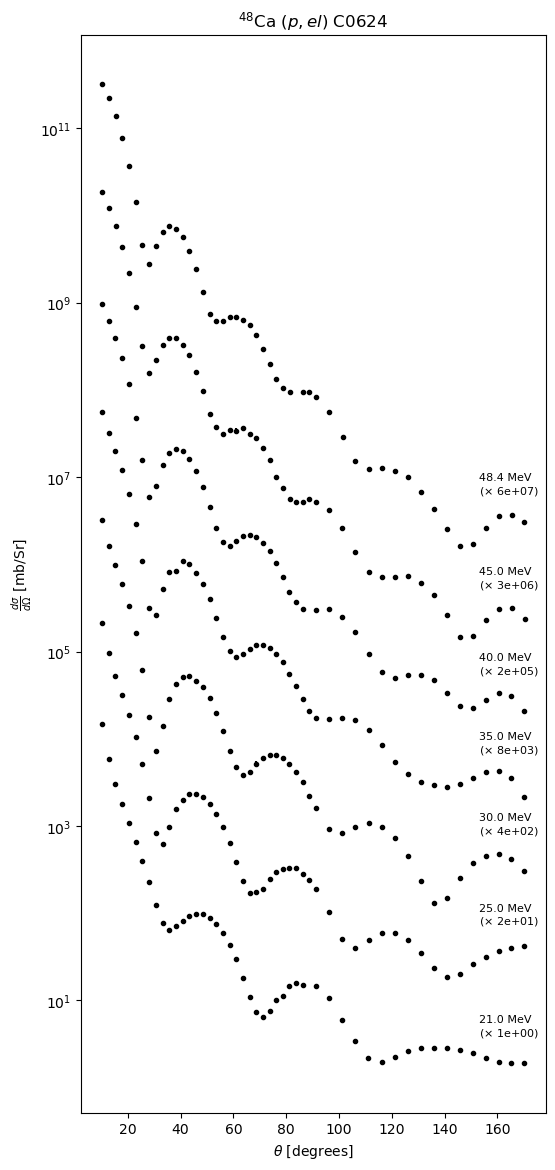

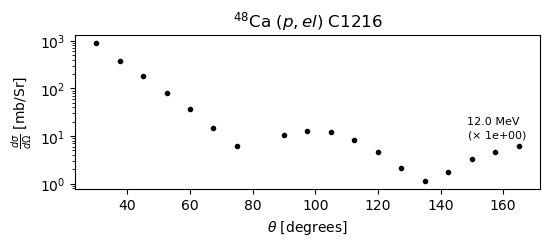

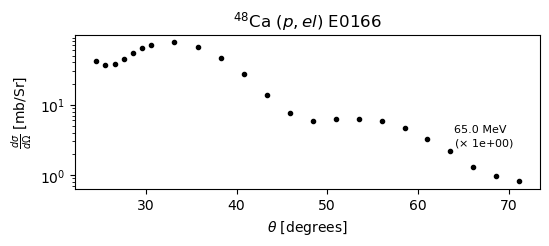

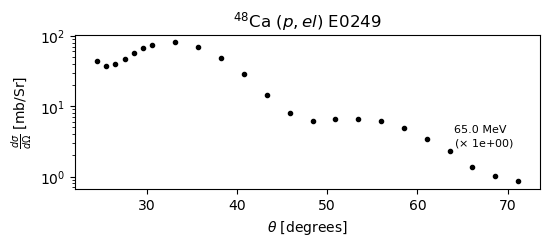

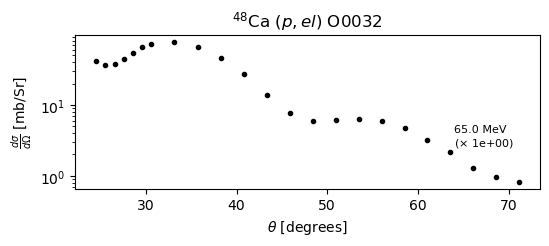

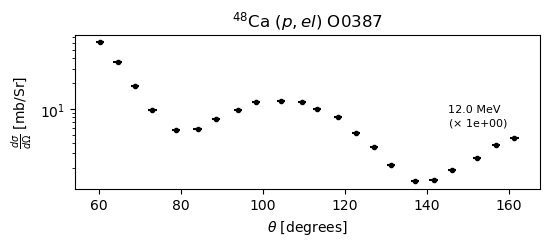

In [37]:
for entry, data in all_entries_pp.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=20,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    ax.set_title(f"{data.fancy_label} {entry}")

In [38]:
all_entries_pp_ruth = exfor_tools.get_exfor_differential_data(
    target=Ca48,
    projectile=(1, 1),
    quantity="dXS/dRuth",
    product="EL",
    energy_range=[10, 200],  # MeV
)

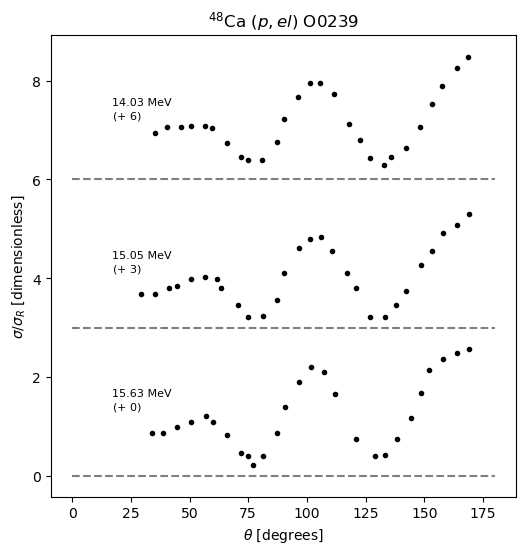

In [54]:
for entry, data in all_entries_pp_ruth.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=3,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.1,
        label_offset_factor=0.1,
        log=False,
        add_baseline=True,
    )
    ax.set_title(f"{data.fancy_label} {entry}")

In [40]:
all_entries_nn = exfor_tools.get_exfor_differential_data(
    target=Ca48,
    projectile=(1, 0),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

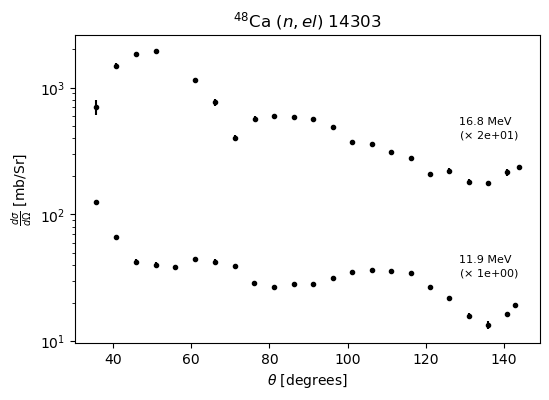

In [41]:
for entry, data in all_entries_nn.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=20,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    ax.set_title(f"{data.fancy_label} {entry}")